<a href="https://colab.research.google.com/github/michaelgodoyf/tareas-proc-digi-multimedia/blob/main/Actividad_5_Godoy_michael_ID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 5</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Michael godoy ferreira</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


In [6]:
!git clone https://github.com/Jorgecardenas1/EIE_401_MULTIMEDIA.git

Cloning into 'EIE_401_MULTIMEDIA'...
remote: Enumerating objects: 308, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 308 (delta 42), reused 59 (delta 14), pack-reused 219
Receiving objects: 100% (308/308), 10.78 MiB | 31.80 MiB/s, done.
Resolving deltas: 100% (136/136), done.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!mv"/content/EIE_401_MULTIMEDIA/Ejemplos/Exercise2.7_adultmale_b_d2.wav".

/bin/bash: line 1: mv/content/EIE_401_MULTIMEDIA/Ejemplos/Exercise2.7_adultmale_b_d2.wav.: No such file or directory


In [4]:
!rm -rf "/content/EIE_401_MULTIMEDIA"

In [8]:
from scipy.io import wavfile

tasa_muestreo, datos = wavfile.read("/content/EIE_401_MULTIMEDIA/Ejemplos/Exercise2.7_adultmale_b_d2.wav")


In [9]:
datos

array([  5,  10,  15, ...,  -9,  -6, -11], dtype=int16)

In [10]:
!pip install -qqq librosa

## 1. Aplique la transformada rápida de fourier a una señal de audio
<p align="justify">
El archivo de audio debe ser formato .WAV, con menos de 30 segundo de duración.


In [11]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio


In [12]:
import scipy .io.wavfile

In [14]:

from scipy.io import wavfile

tasa_muestreo, datos = wavfile.read("/content/EIE_401_MULTIMEDIA/Ejemplos/Exercise2.7_adultmale_b_d2.wav")

# Imprimir la tasa de muestreo y la forma de los datos
print("Tasa de muestreo:", tasa_muestreo)
print("Forma de los datos:", datos.shape)


Tasa de muestreo: 44100
Forma de los datos: (395786,)


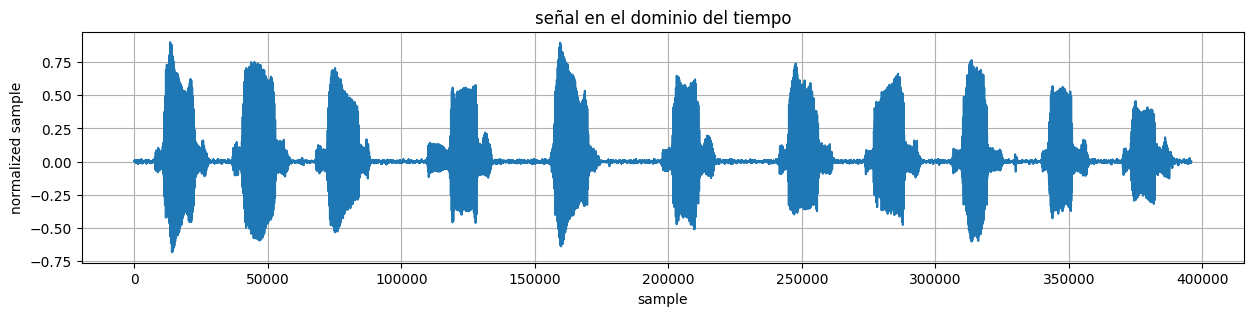

In [15]:
[sample_rate,pcm_data]=scipy.io.wavfile.read("/content/EIE_401_MULTIMEDIA/Ejemplos/Exercise2.7_adultmale_b_d2.wav")
amplitudes=np.array(pcm_data)
#normalizacion
amplitudes=0.9*amplitudes/max(abs(amplitudes));
plt.figure(figsize=(15,3))
plt.plot(amplitudes)
plt.title("señal en el dominio del tiempo")
plt.xlabel("sample")
plt.ylabel("normalized sample")
plt.grid()
#audio
Audio(amplitudes,rate=44100)

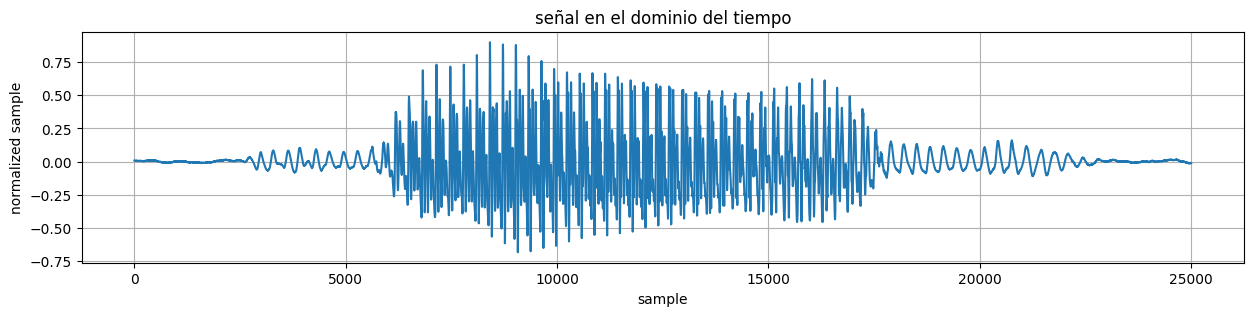

In [16]:
#carga de audio
[sample_rate,pcm_data]=scipy.io.wavfile.read("/content/EIE_401_MULTIMEDIA/Ejemplos/Exercise2.7_adultmale_b_d2.wav")
amplitudes=np.array(pcm_data)
#normalizacion
amplitudes=0.9*amplitudes/max(abs(amplitudes));
slice_signal=amplitudes[5000:30000]
plt.figure(figsize=(15,3))
plt.plot(slice_signal)
plt.title("señal en el dominio del tiempo")
plt.xlabel("sample")
plt.ylabel("normalized sample")
plt.grid()
#audio
Audio(slice_signal,rate=44100)

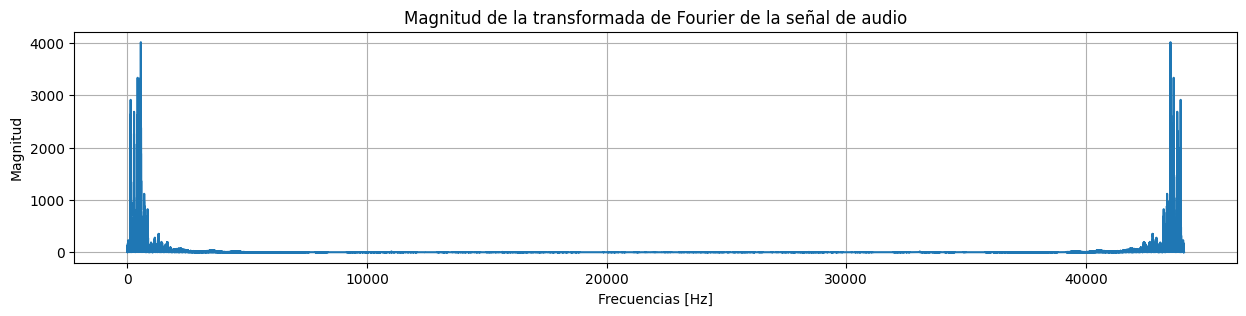

In [25]:
import numpy as np
from scipy.fft import fft
import matplotlib.pyplot as plt

# Transformada de Fourier de la señal de audio
fft_amplitudes = fft(amplitudes)  # Calcula la transformada de Fourier de la señal de amplitudes

# Cálculo de la magnitud y la fase de la transformada de Fourier
magnitude = np.abs(fft_amplitudes)  #  magnitud de la transformada de Fourier
phase = np.angle(fft_amplitudes)  #  fase de la transformada de Fourier

# Graficar la magnitud de la transformada de Fourier
f = sample_rate * np.arange(len(magnitude)) / len(magnitude)  # eje de frecuencias para la gráfica
plt.figure(figsize=(15, 3))  #  nueva figura con un tamaño específico
plt.plot(f, magnitude)  # Grafica la magnitud de la transformada de Fourier en función de la frecuencia
plt.title("Magnitud de la transformada de Fourier de la señal de audio")  # título del gráfico
plt.xlabel("Frecuencias [Hz]")  #  eje x del gráfico
plt.ylabel("Magnitud")  # eje y del gráfico
plt.grid()  # cuadrícula al gráfico
plt.show()  # Muestra el gráfico


## 2. Obtén el espectrograma de tu señal de audio

In [18]:
import matplotlib.pyplot as plt

Longitud de la señal de audio: 395786
Tasa de muestreo: 44100


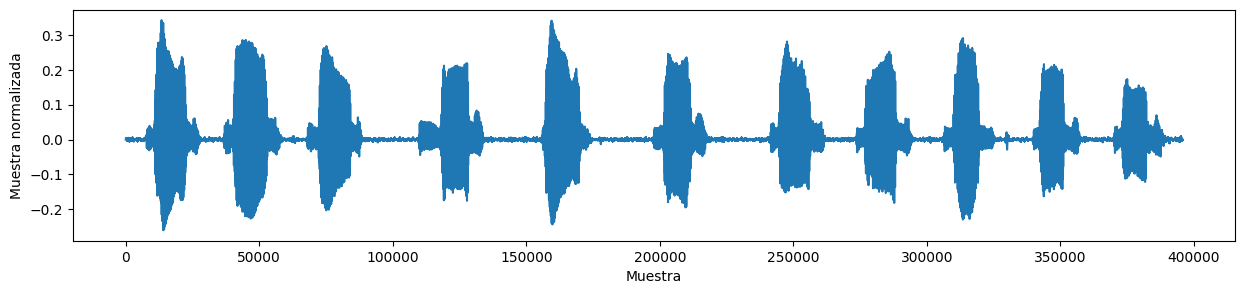

In [26]:

import librosa
import matplotlib.pyplot as plt
# Carga el archivo de audio y obtiene la señal de audio (x) y la tasa de muestreo (sr)
x, sr = librosa.load("/content/EIE_401_MULTIMEDIA/Ejemplos/Exercise2.7_adultmale_b_d2.wav", sr=44100)

#  longitud de la señal de audio y la tasa de muestreo
print("Longitud de la señal de audio:", len(x))
print("Tasa de muestreo:", sr)

#  señal de audio en el dominio del tiempo
plt.figure(figsize=(15, 3))  #  nueva figura con un tamaño específico
plt.plot(x)  #  señal de audio
plt.xlabel("Muestra")  # eje x del gráfico
plt.ylabel("Muestra normalizada")  # eje y del gráfico
plt.show()  # Muestra el gráfico



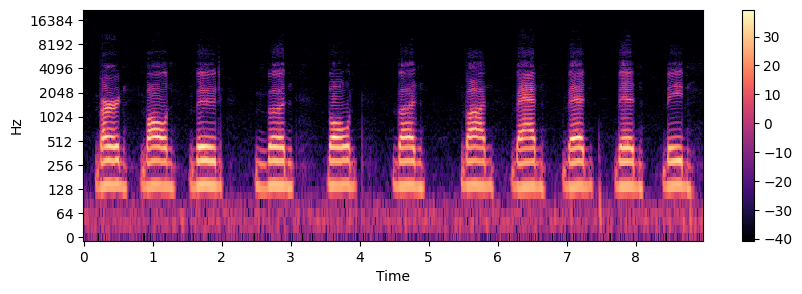

In [27]:
# espectrograma de la señal de audio
x = librosa.stft(x)  # transformada de Fourier de corto tiempo (STFT) a la señal de audio

# Convierte la amplitud a decibeles
xdb = librosa.amplitude_to_db(abs(x))  #  magnitudes de la STFT a decibeles

# Grafica el espectrograma
plt.figure(figsize=(10, 3))  #  nueva figura con un tamaño específico
librosa.display.specshow(xdb, sr=sr, x_axis="time", y_axis="log")  #  espectrograma
plt.colorbar()  # Agrega una barra de color para indicar los valores de amplitud en dB
plt.show()  # Muestra el espectrograma


## 3. Slicing
Desarrolla un framento de código que te permita tomar una señal de audio y framentarla en N segmentos o slices. Debe asignar la longitud temporal de cada slice y el programa debe indicar el número de slices que quedan. Considera que al final puede quedar un slice de longitud diferente a todos los demas.

En el slicing debes también incluir un gap o overlap a lado y lado de cada uno de los fragmentos. Este overlap debe ser ajustable del número de muestras que constituyen dicho overlap.

![image.png](attachment:image.png)

In [73]:
!mv"/content/EIE_401_MULTIMEDIA/Ejemplos/Exercise2.7_adultmale_b_d2.wav".
from scipy.io import wavfile
tasa_muestreo,datos=wavfile.read("/content/EIE_401_MULTIMEDIA/Ejemplos/Exercise2.7_adultmale_b_d2.wav")
from typing import List,Tuple

/bin/bash: line 1: mv/content/EIE_401_MULTIMEDIA/Ejemplos/Exercise2.7_adultmale_b_d2.wav.: No such file or directory


In [74]:
np .floor(2.8)

2.0

In [96]:
def my_slicing(senal_audio: np.ndarray, longitud_slice: int, overlap: int) -> tuple:
    # Calculamos el número de segmentos
    numero_segmentos = int(np.floor((len(senal_audio) - overlap) / (longitud_slice - overlap)))

    segmentos = []  # Lista para almacenar los segmentos
    longitudes_segmento = []  # Lista para almacenar las longitudes de los segmentos

    # Recorrer y crear segmentos con overlap
    for i in range(numero_segmentos):
        inicio = i * (longitud_slice - overlap)  # Calcular el inicio del segmento actual
        fin = inicio + longitud_slice  # Calcular el final del segmento actual
        segmento = senal_audio[inicio:fin]  # Extraer el segmento actual de la señal de audio
        segmentos.append(segmento)  # Agregar el segmento a la lista de segmentos
        longitudes_segmento.append(len(segmento))  # Agregar la longitud del segmento a la lista de longitudes

    # Manejar el último segmento
    ultimo_inicio = fin  # Calcular el inicio del último segmento
    ultimo_fin = len(senal_audio)  # Calcular el final del último segmento
    ultimo_segmento = senal_audio[ultimo_inicio:ultimo_fin]  # Extraer el último segmento de la señal de audio
    segmentos.append(ultimo_segmento)  # Agregar el último segmento a la lista de segmentos
    longitudes_segmento.append(len(ultimo_segmento))  # Agregar la longitud del último segmento a la lista de longitudes

    return segmentos, longitudes_segmento  # Devolver los segmentos y sus longitudes como una tupla



In [97]:
signal=np.linspace(1,10,10)
signal

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [98]:
segmento,len_seg=my_slicing(signal,4,2)

In [99]:
segmento

[array([1., 2., 3., 4.]),
 array([3., 4., 5., 6.]),
 array([5., 6., 7., 8.]),
 array([ 7.,  8.,  9., 10.]),
 array([], dtype=float64)]

In [101]:
segmento,len_seg=my_slicing(datos,30000,0)

In [102]:
len(segmento)

14

## 3.1 Slicing usando Pytorch de la señal obtenida en el primer punto.
Debes crear un array con los slices creados a partir de tensores en pytorch.
Grafica un par de tus slices y reproduce el audio.


In [21]:
import torch  # Cambio de la importación a torch

from scipy.io import wavfile as lector_wav  # Cambio del nombre de la función a lector_wav

# Leer el archivo de audio usando la función lector_wav
tasa_muestreo, datos_audio = lector_wav.read("/content/EIE_401_MULTIMEDIA/Ejemplos/Exercise2.7_adultmale_b_d2.wav")

# Imprimir la tasa de muestreo y la forma de los datos
print("Tasa de muestreo:", tasa_muestreo)  # Imprimir la tasa de muestreo
print("Forma de los datos:", datos_audio.shape)  # Imprimir la forma de los datos de audio


Tasa de muestreo: 44100
Forma de los datos: (395786,)


In [22]:
signal=torch.tensor(datos)


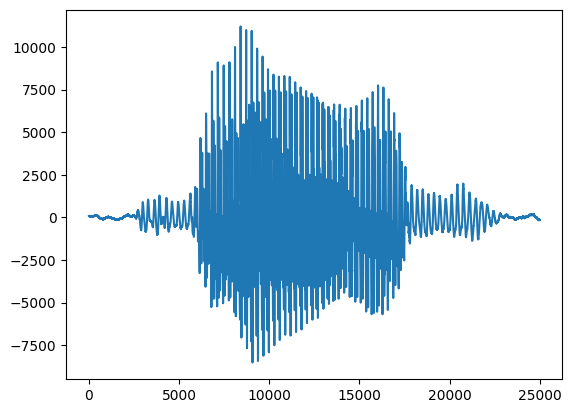

In [23]:
plt.plot(signal[5000:30000].numpy())
Audio(signal[5000:30000],rate=44100)

## 4. Filtro Butterworth para una señal de audio.
Diseña y aplica un filtro butterworth a tu señal de audio.
Muestra un gráfico con la respuesta del filtro butterworth y explica el resultado.

In [43]:
from scipy.signal import butter, lfilter


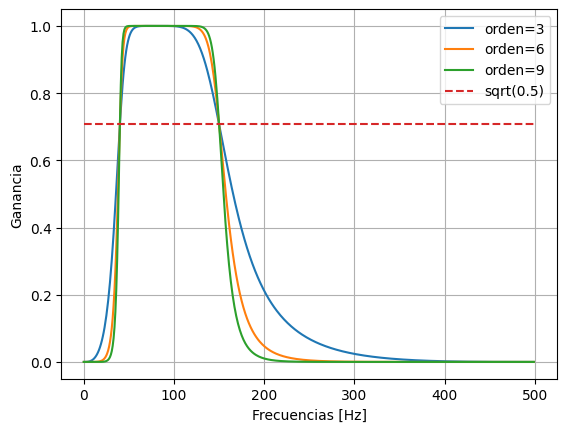

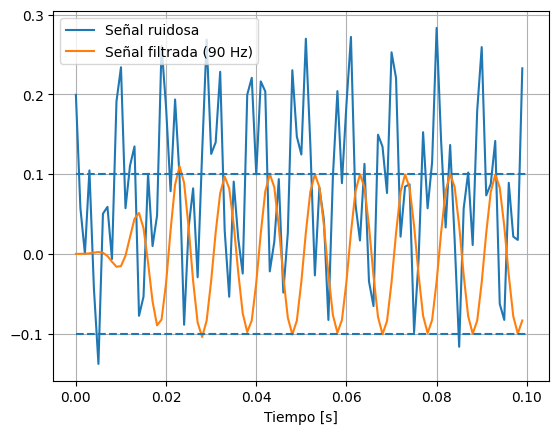

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz

def filtro_pasa_banda_butterworth(frec_baja, frec_alta, fs, orden=5):
    # Nyquist es la mitad de la frecuencia de muestreo
    nyquist = 0.5 * fs
    # Normalizar las frecuencias de corte
    baja_norm = frec_baja / nyquist
    alta_norm = frec_alta / nyquist
    # Crear el filtro Butterworth
    return butter(orden, [baja_norm, alta_norm], btype='bandpass')

def filtrar_con_filtro_pasa_banda(signal, frec_baja, frec_alta, fs, orden=5):
    # Obtener los coeficientes del filtro Butterworth
    b, a = filtro_pasa_banda_butterworth(frec_baja, frec_alta, fs, orden=orden)
    # Filtrar la señal
    return lfilter(b, a, signal)

# Frecuencia de muestreo
fs = 1000.0
# Frecuencias de corte para el filtro
frec_baja = 40.0
frec_alta = 150

# Visualización del filtro en el dominio de la frecuencia
plt.figure(1)
plt.clf()
for orden in [3, 6, 9]:
    # Obtener los coeficientes del filtro
    b, a = filtro_pasa_banda_butterworth(frec_baja, frec_alta, fs, orden=orden)
    # Calcular la respuesta en frecuencia
    w, h = freqz(b, a, fs=fs, worN=500)
    plt.plot(w, abs(h), label="orden=%d" % orden)

# Línea para marcar la raíz cuadrada de 0.5
plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)], "--", label="sqrt(0.5)")
plt.xlabel("Frecuencias [Hz]")
plt.ylabel("Ganancia")
plt.grid(True)
plt.legend(loc="best")

# Generación de una señal ruidosa
T = 0.1
muestras = T * fs
t = np.arange(0, muestras) / fs
amplitud_ruido = 0.1
frec_ruido = 90.0
x = 0.1 * np.sin(2 * np.pi * 1.2 * np.sqrt(t))
x += 0.1 * np.cos(2 * np.pi * 312 * t + 0.1)
x += amplitud_ruido * np.cos(2 * np.pi * 100 * t)

# Visualización de la señal ruidosa
plt.figure(2)
plt.clf()
plt.plot(t, x, label="Señal ruidosa")

# Filtrado de la señal y visualización
y = filtrar_con_filtro_pasa_banda(x, frec_baja, frec_alta, fs, orden=9)
plt.plot(t, y, label="Señal filtrada (%g Hz)" % frec_ruido)
plt.xlabel("Tiempo [s]")
plt.hlines([-amplitud_ruido, amplitud_ruido], 0, T, linestyles="--")
plt.grid(True)
plt.axis("tight")
plt.legend(loc="upper left")
plt.show()


## 4. Referencias
<p align="justify">
    
[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Análisis espectral] https://currents.soest.hawaii.edu/ocn_data_analysis/_static/Spectrum.html
